# LOAN DEFAULT AND RISK ANALYSIS

##### Pandas is a great tool used for manipulating and wrangling around with the data
##### I will also use matplotlib and Seaborn for data visualizations purposes 

# OUR WORKFLOW WILL BE AS FOLLOWS
#### 1. Data loading and preprocessing
#### 2. Data cleaning and Explorations
#### 3. Descriptive stats
#### 4. Univariate analysis
#### 5. Bivariate analysis
#### 6. Modelling & prediction
#### 7. Prescription

# Data LOADING AND PROCESSING

In [1]:
import pandas as pd ## data manupulation
import numpy as np ## numerical computations
import matplotlib.pyplot as plt ## data visualization
%matplotlib inline
import seaborn as sns ## data visualization
import warnings
warnings.filterwarnings(action='ignore')
import os
pd.options.display.max_columns = None
from tqdm.notebook import tqdm_notebook
sns.set_style('darkgrid')
import random
random.seed(2021)
import datetime as dt
import string
import re
import regex
plt.rcParams['font.size'] = 25
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
## loading our data using pandas library
data = pd.read_csv('lending_club_loans.csv')
var_Desc = pd.read_csv('LCDataDictionary.csv')

In [3]:
## taking a look at few rows 
data.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-2015,171.62,NaN,Sep-2016,744.0,740.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2016,499.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-2014,649.91,NaN,Sep-2016,719.0,715.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
## understanding the variables
var_Desc

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


# DATA CLEANING AND EXPLORATION

In [5]:
## shape of our dataset
data.shape

(42538, 116)

Our data has 42,538 rows and 116 columns

In [6]:
## checking for any duplicates
data.duplicated().any()

False

As seen above our data has no duplicates

In [7]:
# data types 
data.dtypes

Unnamed: 0                      int64
id                             object
member_id                     float64
loan_amnt                     float64
funded_amnt                   float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 116, dtype: object

In [8]:
data.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-2015,171.62,NaN,Sep-2016,744.0,740.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2016,499.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
## categorizing our data types and storing them in list to make sure they are in their correct dtype
obj = [col for col in data.columns if data[col].dtype == 'object']
num = [col for col in data.columns if data[col].dtype != 'object']

In [10]:
obj

['id',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [11]:
num

['Unnamed: 0',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',

Intrest rate and revolving line utilization have been categorized as objects which is wrong need to
be rectified. So we change the data type of these columns and replace % with whitespace as follows

In [12]:
data['int_rate'] = pd.to_numeric(data['int_rate'].str.replace('%', ''))
data['revol_util'] = pd.to_numeric(data['revol_util'].str.replace('%', ''))

In [13]:
print(data['int_rate'].dtype)
print(data['revol_util'].dtype)

float64
float64


In [14]:
data.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-2015,171.62,NaN,Sep-2016,744.0,740.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2016,499.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [15]:
## checking the uniqueness of id and member id columns
print(' The shape of the whole dataset is {} and unique values of id column is {}'.format(data.shape
                                                                        [0], data['id'].nunique()))

print('The shape of the whole dataset is {} and unique values in member id column is {}'.format(

                            data.shape[0], data['member_id'].nunique()))

 The shape of the whole dataset is 42538 and unique values of id column is 42538
The shape of the whole dataset is 42538 and unique values in member id column is 42535


For now let's remove the unnamed: 0, url, desc, zip code, member id and id columns since will have no impact

In [16]:
columns_to_drop = ['Unnamed: 0', 'id', 'member_id', 'zip_code', 'url', 'desc']

data.drop(data[columns_to_drop], axis = 1, inplace = True)

print(data.shape)

(42538, 110)


In [17]:
## checking for basic information on the data. Inspecting data
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 110 entries, loan_amnt to total_il_high_credit_limit
dtypes: float64(91), object(19)
memory usage: 35.7+ MB


We have 19 categorical variables, and a total of 92 numerical data types

Next step is to check the number of missing values in each column in our dataset as follows

In [18]:
def check_missing(df):
    ## Total missing values 
    
    missing_values = df.isnull().sum()
    
    ## calculating the % of missing values 
    perc = (missing_values / df.shape[0]) * 100
    
    ## making a table
    missing_df = pd.concat([missing_values, perc], axis = 1)
    
    ## renaming the columns
    missing_df = missing_df.rename(columns = {0: 'Missing values', 1: 'Percentage_of_missing'})
    
    ## sorting our values 
    missing_df = missing_df[
            missing_df.iloc[:,1] != 0].sort_values(
        'Percentage_of_missing', ascending=False).round(1)
    
    ## lets get some summary of these missing values
    print('There are {} missing values that are greater than 50%'.format(list(missing_df['Percentage_of_missing'] >= 30)))
    
    ## return our table
    return missing_df

In [19]:
check_missing(data)

There are [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False] missing values that are greater than 50%


,Missing values,Percentage_of_missing
total_il_high_credit_limit,42538,100.0
mths_since_recent_bc,42538,100.0
open_rv_24m,42538,100.0
mo_sin_rcnt_rev_tl_op,42538,100.0
mo_sin_old_rev_tl_op,42538,100.0
...,...,...
out_prncp,3,0.0
initial_list_status,3,0.0
revol_bal,3,0.0
application_type,3,0.0


As seen there are columns which has a lot of missing values. We will drop any column that has missing values that are greater than or equal to 30% of the total observed values

In [20]:
## printing all columns that have missing values greater than 20% of the total observed values
for col in data.columns:
    if ((data[col].isnull().sum() / data.shape[0]) * 100 ) > 20:
        print(col)

mths_since_last_delinq
mths_since_last_record
next_pymnt_d
mths_since_last_major_derog
annual_inc_joint
dti_joint
verification_status_joint
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
tot_hi_cred_lim
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit


In [21]:
## iterating through these columns and removing all of these columns that have missing values 
# greater than 20% of the total observed values
for col in data.columns:
    if ((data[col].isnull().sum() / data.shape[0]) * 100 ) > 20:
        data.drop([col], axis = 1, inplace = True)

In [22]:
print(data.shape[1])

53


In [23]:
data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [24]:
## basic info about our new data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   funded_amnt                 42535 non-null  float64
 2   funded_amnt_inv             42535 non-null  float64
 3   term                        42535 non-null  object 
 4   int_rate                    42535 non-null  float64
 5   installment                 42535 non-null  float64
 6   grade                       42535 non-null  object 
 7   sub_grade                   42535 non-null  object 
 8   emp_title                   39909 non-null  object 
 9   emp_length                  41423 non-null  object 
 10  home_ownership              42535 non-null  object 
 11  annual_inc                  42531 non-null  float64
 12  verification_status         42535 non-null  object 
 13  issue_d                     425

In [25]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,Sep-2016,67.79,Sep-2016,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


Next we fill the missing values with mean for numerical values and mode for categorical variables, we can't drop the columns for now or drop the missing values since we don't know the information about columns. 

In [26]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode())
        
for col in data.columns:
    if data[col].dtype != 'object':
        data[col] = data[col].fillna(data[col].mean())

In [27]:
data.isnull().sum().any()

True

We can see that we still have missing values even after replacing let check further what is going on

In [28]:
## lets check the unique values for one of the categorical variables
data['term'].unique()

array([' 36 months', ' 60 months', nan], dtype=object)

We can see nan as one of the categories

In [29]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [30]:
## know how to do away with this

# DESCRIPTIVES STATISTICS

In [31]:
## finding the basic statistics 
data.describe(include='object').T

,count,unique,top,freq
term,42535,2,36 months,31534
grade,42535,7,B,12389
sub_grade,42535,35,B3,2997
emp_title,39910,30658,US Army,140
emp_length,41423,11,10+ years,9369
home_ownership,42535,5,RENT,20181
verification_status,42535,3,Not Verified,18758
issue_d,42535,55,Dec-2011,2267
loan_status,42535,9,Fully Paid,33586
pymnt_plan,42535,2,n,42534


From above we can infer that loans that lasted for 36 months have the highest frequency, also we can infer that for most of the people.

Also we can note that most of the paid out their loans since fully paid has the highest frequency in the loan status unique values

To avoid the problem of cardinality and multicollinearity that is curse of dimensionality we have to drop columns that have the highest number of unique values like sub_grade, emp_title, issue_id, title, addr_state, earliest_cr_line, last_pymnt_d, last_credit_pull_d.

In our list of columns to drop we will also add those that have single unique values such as initial_list_status and application_type

In [32]:
data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [33]:
data.drop(['sub_grade','emp_title','issue_d','title','addr_state','earliest_cr_line','last_pymnt_d'
          ,'last_credit_pull_d','initial_list_status','application_type'], axis = 1, inplace = True)

print(f' New shape of our dataset is: ', data.shape)

 New shape of our dataset is:  (42538, 43)


In [34]:
## numerical statistics
data.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,42538.0,11089.722581,7410.677051,500.00,5200.00000,9700.000000,15000.000000,3.500000e+04
funded_amnt,42538.0,10821.585753,7146.662646,500.00,5000.00000,9600.000000,15000.000000,3.500000e+04
funded_amnt_inv,42538.0,10139.830603,7131.434954,0.00,4950.00000,8500.000000,14000.000000,3.500000e+04
int_rate,42538.0,12.165016,3.707805,5.42,9.63000,11.990000,14.720000,2.459000e+01
installment,42538.0,322.623063,208.919849,15.67,165.55000,277.705000,428.105000,1.305190e+03
annual_inc,42538.0,69136.556420,64091.075570,1896.00,40000.00000,59000.000000,82485.000000,6.000000e+06
dti,42538.0,13.373043,6.726078,0.00,8.20000,13.470000,18.680000,2.999000e+01
delinq_2yrs,42538.0,0.152449,0.512214,0.00,0.00000,0.000000,0.000000,1.300000e+01
fico_range_low,42538.0,713.052545,36.187162,610.00,685.00000,710.000000,740.000000,8.250000e+02
fico_range_high,42538.0,717.052545,36.187162,614.00,689.00000,714.000000,744.000000,8.290000e+02


# UNIVARIATE ANALYSIS

In [35]:
data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,171.62,744.0,740.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,499.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
data['loan_status'].describe()

count          42535
unique             9
top       Fully Paid
freq           33586
Name: loan_status, dtype: object

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64


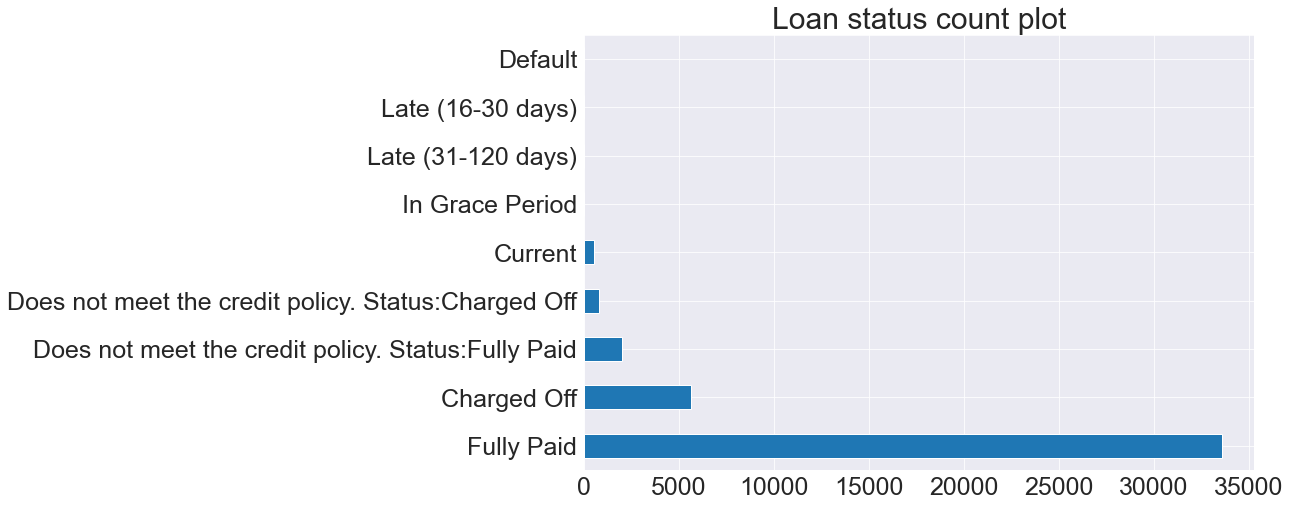

In [37]:
plt.figure(figsize = (12, 8))
data['loan_status'].value_counts().plot(kind = 'barh')
plt.title('Loan status count plot')

## we print the count on each 
print(data['loan_status'].value_counts())

We want to categorize loan status in a presentable way. We shall combine variables such as Default, Late(16-30 days), late(31-120 days), Does not meet the credit policy(charged off).

We will not categorize those in grace period as defaulters we shall assume that they will make full payments after the grace period has ended

In [38]:
map_ = {'Default': 'Charged_off', 'Late (31-120 days)': 'Charged_off', 'Late (16-30 days)': 'Charged_off', 'Does not meet the credit policy. Status:Charged Off': 'Charged_off', 'Fully Paid': 'Fully_paid', 'Current': 'Fully_paid', 'Does not meet the credit policy. Status:Fully Paid': 'Fully_paid', 'In Grace Period': 'Fully_paid', 'Charged Off': 'Charged_off'}

data.loan_status = data.loan_status.replace(map_)

print(data.loan_status.value_counts())

Fully_paid     36103
Charged_off     6432
Name: loan_status, dtype: int64


Fully_paid     0.848783
Charged_off    0.151217
Name: loan_status, dtype: float64


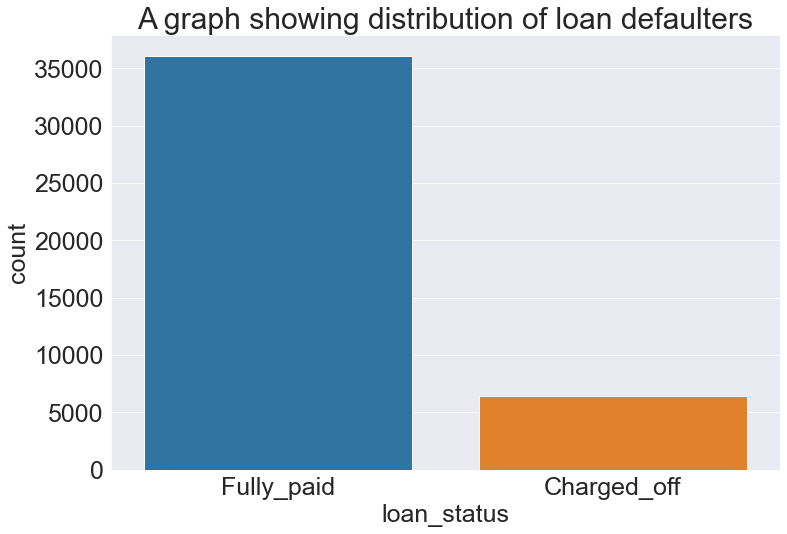

In [39]:
plt.figure(figsize = (12, 8))
plt.title('A graph showing distribution of loan defaulters')
sns.countplot(data['loan_status'])

print(data['loan_status'].value_counts(normalize=True))

Our data is highly imbalanced with only 15.12% defaulting.

 36 months    0.741366
 60 months    0.258634
Name: term, dtype: float64
10+ years    0.226179
< 1 year     0.122203
2 years      0.114502
3 years      0.105352
4 years      0.088091
1 year       0.086788
5 years      0.083480
6 years      0.057335
7 years      0.045265
8 years      0.038433
9 years      0.032373
Name: emp_length, dtype: float64
RENT        0.474456
MORTGAGE    0.445727
OWN         0.076431
OTHER       0.003197
NONE        0.000188
Name: home_ownership, dtype: float64


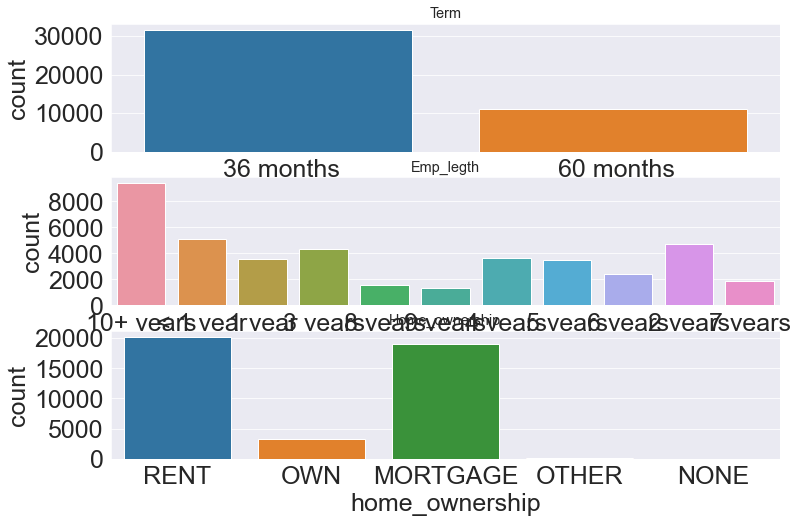

<Figure size 504x576 with 0 Axes>

In [40]:
fig, ax = plt.subplots(3, 1)
plt.rcParams['font.size'] = 12
plt.figure(figsize=(7, 8))
sns.countplot(data['term'], ax=ax[0])
ax[0].set_title('Term')

sns.countplot(data['emp_length'], ax = ax[1])
ax[1].set_title('Emp_legth')

sns.countplot(data['home_ownership'], ax = ax[2])
ax[2].set_title('Home_ownership')

print(data['term'].value_counts(normalize=True))
print(data['emp_length'].value_counts(normalize=True))
print(data['home_ownership'].value_counts(normalize=True))

Most of the loans lasted for 36 months term with only about 25.86% lasting for 60 months, again most of the loans lasted for 10+ years whereas few people owned a house with only 7.6% of the people owned a house

Not Verified       0.441002
Verified           0.316704
Source Verified    0.242295
Name: verification_status, dtype: float64
Fully_paid     0.848783
Charged_off    0.151217
Name: loan_status, dtype: float64
n    0.999976
y    0.000024
Name: pymnt_plan, dtype: float64
debt_consolidation    0.464935
credit_card           0.128765
other                 0.104032
home_improvement      0.075209
major_purchase        0.054332
small_business        0.046832
car                   0.037969
wedding               0.023604
medical               0.017703
moving                0.014788
house                 0.010015
educational           0.009921
vacation              0.009404
renewable_energy      0.002492
Name: purpose, dtype: float64


Text(0.5, 1.0, 'purpose')

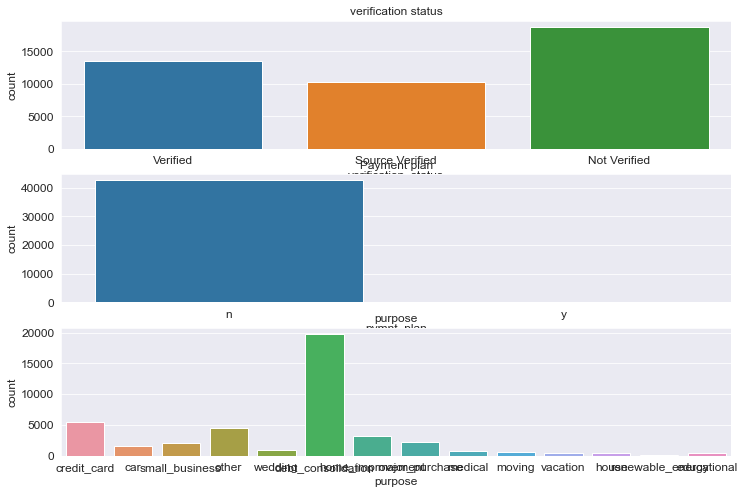

<Figure size 576x576 with 0 Axes>

In [41]:
fig, ax = plt.subplots(3, 1)
plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 10

print(data['verification_status'].value_counts(normalize=True))
print(data['loan_status'].value_counts(normalize=True))
print(data['pymnt_plan'].value_counts(normalize=True))
print(data['purpose'].value_counts(normalize=True))


sns.countplot(data['verification_status'], ax = ax[0])
ax[0].set_title('verification status')

sns.countplot(data['pymnt_plan'], ax = ax[1])
ax[1].set_title('Payment plan')

sns.countplot(data['purpose'], ax = ax[2])
ax[2].set_title('purpose')

From the above we can infer that almost 44.10% of the loans were not verified with only 31.67% were verified within within that period. 


78.96% of the people fully paid for their loans on time where only 13.29% of the loans being charged off. 


Payment plans consisted about 99.999% monthly. During modelling we will remove this feature since it will not help our model in any way.

We can also see that most of the people ussualy took loan for debt consolidation (46.49%) followed by 12.87% of the people for credit card

Lets consider some of the continous variables. Mostly we want to analyze interest rate, funded amnt, loan amount among others to understand their distribution and how they are distributed along with some of the levels or categorical variables

Text(0.5, 1.0, 'boxplot for interest rate')

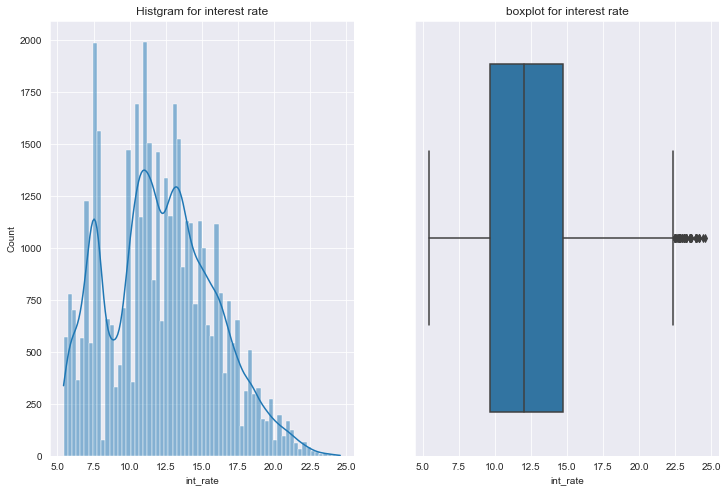

<Figure size 864x576 with 0 Axes>

In [42]:
# A box plot is essential tool that gives a five summary statistics about a variable
fig, ax = plt.subplots(1, 2)
plt.figure(figsize = (12, 8))

sns.histplot(data['int_rate'], ax=ax[0], kde=True)
ax[0].set_title('Histgram for interest rate')

sns.boxplot(data['int_rate'], ax=ax[1])
ax[1].set_title('boxplot for interest rate')

We can infer some few things from the above figures.

Interest rate is slightly right skewed with most of the interest rates charged between 10.0 - 15.0

Also the minimum interest rate is about 5%

Text(0.5, 1.0, 'boxplot for loan amount')

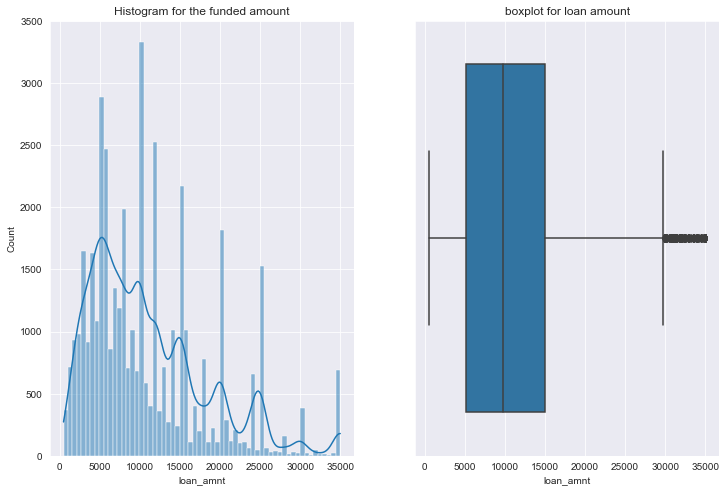

<Figure size 864x576 with 0 Axes>

In [43]:
fig, ax = plt.subplots(1, 2)
plt.figure(figsize=(12, 8))

sns.histplot(data['loan_amnt'], ax=ax[0], kde=True)
ax[0].set_title('Histogram for the funded amount')

sns.boxplot(x = 'loan_amnt', ax=ax[1], data = data)
ax[1].set_title('boxplot for loan amount')

We can notice that loan amount is skewed to the right and most of the people were granted an amount between 5000 and 10000

Text(0.5, 1.0, 'Distribution of annual income per person')

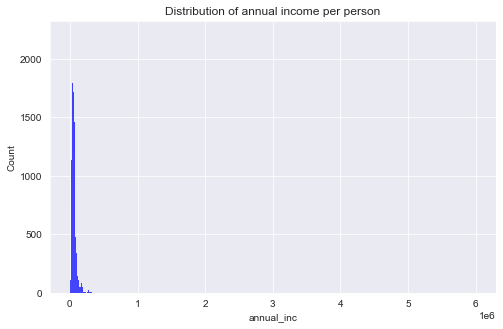

In [44]:
## Lets see what most of the people are earning annualy 
plt.figure(figsize = (8, 5))
sns.histplot(data['annual_inc'], cbar=True, color='blue', stat = 'count')
plt.title('Distribution of annual income per person')

# BIVARIATE ANALYSIS

We will explore how different variables relate to each other

Text(0.5, 1.0, 'Scatterplot for loan amount and interest rate')

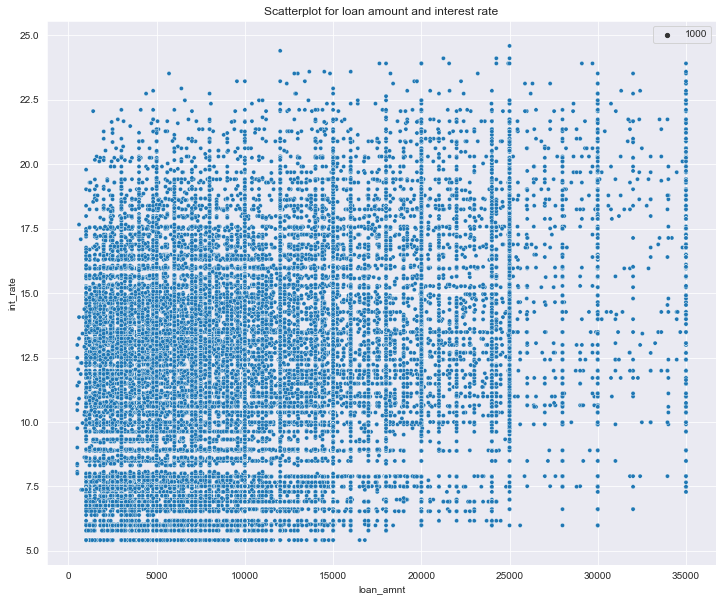

In [45]:
plt.figure(figsize = (12, 10))
sns.scatterplot(x = 'loan_amnt', y = 'int_rate', data = data, size=1000)
plt.title('Scatterplot for loan amount and interest rate')

We can clearly see some association of loan amount with interest rate. The scatterplot above shows that as interest rate increases less people applying for the loan

Text(0.5, 1.0, 'Boxplot for interest rate with relation to term of loan')

<Figure size 720x864 with 0 Axes>

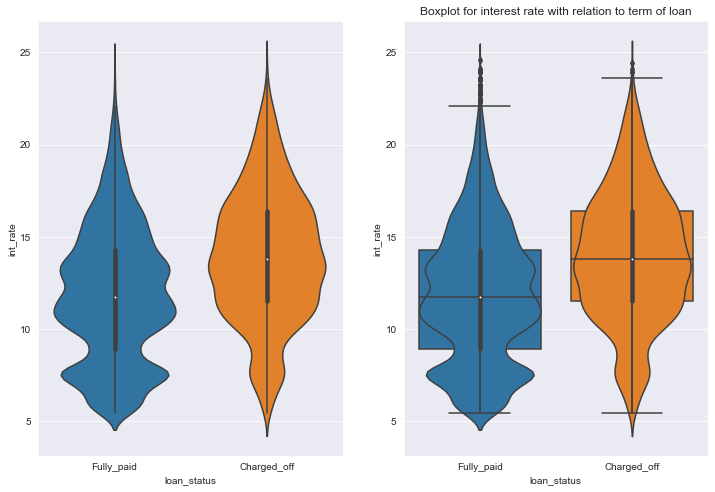

In [51]:
plt.figure(figsize=(10, 12))
fig, ax = plt.subplots(1, 2)
sns.violinplot(data['loan_status'], data['int_rate'], ax = ax[0])
sns.boxplot(x = 'loan_status', y = 'int_rate', data = data, ax = ax[1])
sns.violinplot(data['loan_status'], data['int_rate'])
plt.title('Boxplot for interest rate with relation to term of loan')

From above we can infer that most people who defaulted loans had relatively applied loans with high interest rates compared to those who paid their loans. This shows that people who are likely to default are those that applied loans with high interest rates

Text(0.5, 1.0, 'Boxplot for interest rate with relation to term of loan')

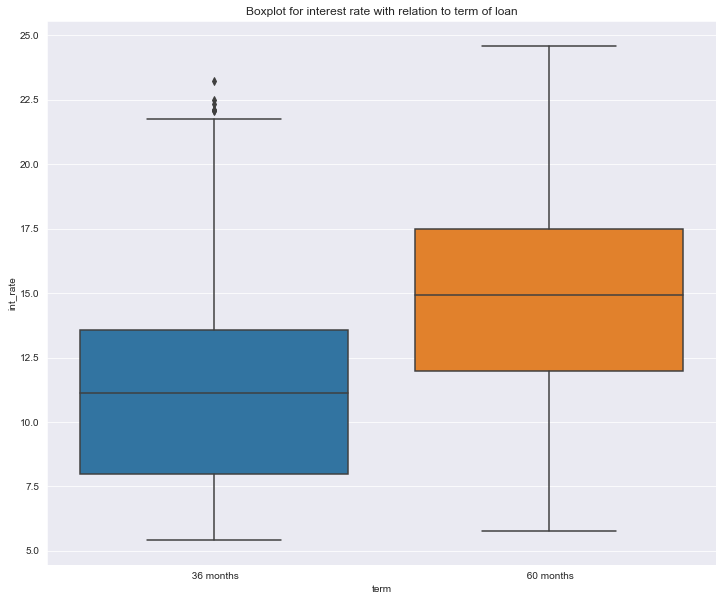

In [47]:
plt.figure(figsize=(12, 10))
sns.boxplot(x = 'term', y = 'int_rate', data = data)
plt.title('Boxplot for interest rate with relation to term of loan')

The above boxplots shows that for loans that lasted for 36 months had less interest rate compared to those that lasted for 60 months

In [48]:
data.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully_paid,n,credit_card,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,171.62,744.0,740.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'How grade and interest relate to the term of the loan')

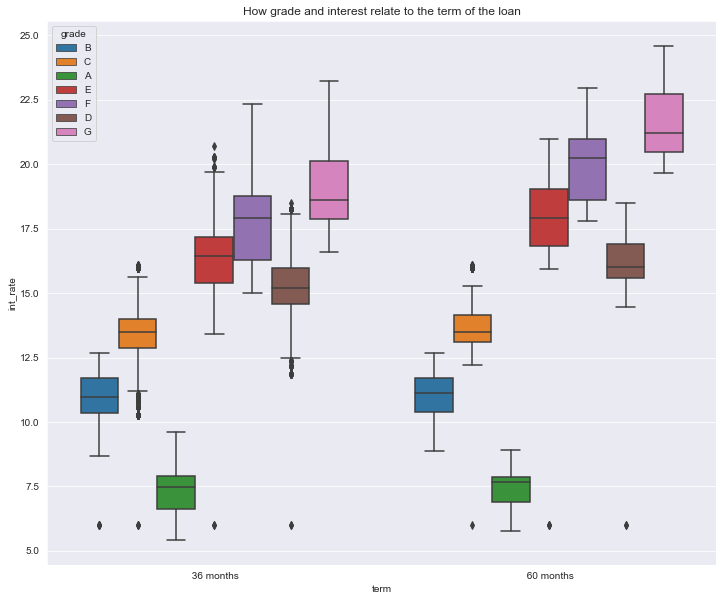

In [49]:
## lets also understand with another dimension
plt.figure(figsize=(12, 10))
sns.boxplot(x = 'term', y = 'int_rate', hue = 'grade', data = data)
plt.title('How grade and interest relate to the term of the loan')

In [53]:
data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully_paid,n,credit_card,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,171.62,744.0,740.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged_off,n,car,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,499.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


We can infer that for people with grade G have the highest chance of applying loans with large interest rates.

<Figure size 864x720 with 0 Axes>

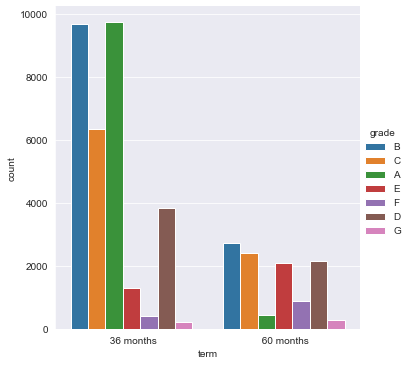

In [58]:
plt.figure(figsize = (12, 10))
sns.catplot(x = 'term', hue = 'grade', kind = 'count', data = data)

People of grade B and A applied loans which lasted for 36 months more than others